In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


## sample image

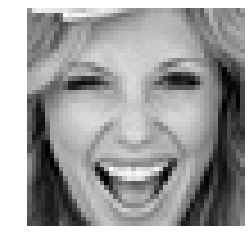

In [2]:
IMG_PATH = "../dataset/train"
img = cv2.imread(IMG_PATH+"/happy/232.jpg")
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()


In [3]:
folders= os.listdir("../dataset/train")

In [4]:
folders

['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [5]:
print("training data")
for f in folders:
  path="../dataset/train/"+f
  print(f + " "+str(len(os.listdir(path))))
  
print("\n\nvalidation data")
for f in folders:
  path="../dataset/validation/"+f
  print(f + " "+str(len(os.listdir(path))))

training data
Angry 3993
Happy 7164
Neutral 4982
Sad 4938
Surprise 3205


validation data
Angry 960
Happy 1825
Neutral 1216
Sad 1139
Surprise 797


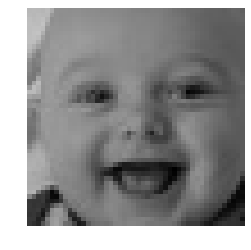

In [6]:
sample_path= "../dataset/train/happy/10005.jpg"
img = image.load_img(sample_path)
x=image.img_to_array(img)/255.0
plt.imshow(x)
plt.axis("off")
plt.show()

In [7]:
classes = ["angry", "happy", "neutral", "sad", "surprise"]

In [8]:
from keras.layers import *
from keras.models import Sequential

In [9]:
model = Sequential()

# Block-1
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-2 

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-3

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-4 

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Block-5

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Block-6

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7

model.add(Dense(6,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

W0523 01:05:21.558156  3960 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0523 01:05:21.592492  3960 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0523 01:05:21.602469  3960 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0523 01:05:21.641367  3960 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0523 01:05:21.642363  39

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
__________

In [11]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [12]:
checkpoint = ModelCheckpoint('../weights/Emotion_detection_CNN.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [13]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )


In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

In [15]:
callbacks = [earlystop,checkpoint,reduce_lr]


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

W0523 01:06:20.839332  3960 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [17]:
train_data_dir = '../dataset/train'
validation_data_dir = '../dataset/validation'

In [18]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    width_shift_range=0.4,
                    height_shift_range=0.4,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(48,48),
                    batch_size=32,
                    class_mode='categorical',
                    shuffle=True)

Found 24282 images belonging to 5 classes.


In [21]:
validation_generator = validation_datagen.flow_from_directory(
                    validation_data_dir,
                    color_mode='grayscale',
                    target_size=(48,48),
                    batch_size=32,
                    class_mode='categorical',
                    shuffle=True)

Found 5937 images belonging to 5 classes.


In [22]:
nb_train_samples = 28385
nb_validation_samples = 6955
epochs=25
batch_size=32

In [75]:
history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

Epoch 1/25
886/887 [============================>.] - ETA: 0s - loss: 1.3155 - acc: 0.4914

KeyboardInterrupt: 

In [23]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [33]:
face_classifier = cv2.CascadeClassifier('../models/haarcascade_frontalface_default.xml')
classifier =load_model('../weights/Emotion_little_vgg.h5')

In [34]:
validation_generator.class_indices

{'Angry': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3, 'Surprise': 4}

In [30]:
classifier.predict_generator()


TypeError: predict_generator() missing 1 required positional argument: 'generator'

In [64]:
acc=history.history["acc"]
val_acc=history.history["val_acc"]

In [65]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]

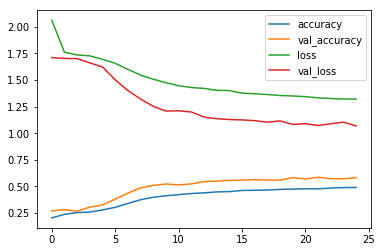

In [66]:
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val_accuracy")
plt.plot(loss,label="loss")
plt.plot(val_loss,label="val_loss")
plt.legend()
plt.show()

In [31]:
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break
  

(32, 48, 48, 1)
(32, 5)


In [35]:
cap = cv2.VideoCapture(0)
class_labels = ['Angry','Happy','Neutral','Sad','Surprise']

while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    labels = []
   # print(frame.shape)
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    # rect,face,image = face_detector(frame)


        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

        # make a prediction on the ROI, then lookup the class

            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            print(label)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad


In [19]:
## 60 % accuracy in CNN 

[[536  51 212 212]]


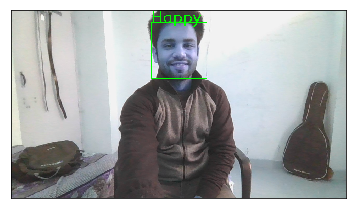

In [36]:
#def detectEmotionImage(image):
img = cv2.imread('../sahil5.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roicolor = img[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    
    if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
                                 
            preds = classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    else:
            cv2.putText(img,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
   
plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)

In [37]:
def detect(image):
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    #plt.imshow(img)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    
        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            preds = classifier1.predict(roi)[0]
            label=classes[preds.argmax()]
            label_position = (x,y)
            cv2.putText(img,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
        else:
            cv2.putText(img,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
   
    plt.grid(None)   
    plt.xticks([])
    plt.yticks([])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(img)
    print("Emotion:-"+label)


In [49]:
img='../img/woman1.jpg'

Emotion:-happy


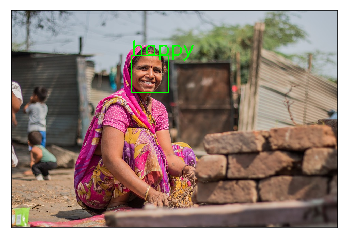

In [50]:
detect(img)

In [40]:
#58 percent accuracy